In [ ]:
# https://www.youtube.com/watch?v=pYxNSUDSFH4&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=39
# https://www.youtube.com/watch?v=XepXtl9YKwc&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=40
# https://www.youtube.com/watch?v=Dn6b9fCIUpM&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=44

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm 

#### standard normal density

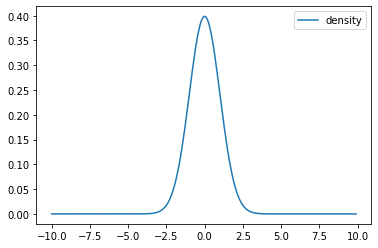

In [3]:
x_arr = np.arange(-10,10,0.1)
density_arr = norm.pdf(x_arr)
pd.DataFrame({
    'density':density_arr
}, index=x_arr).plot()

In [4]:
norm.pdf(0)

0.3989422804014327

#### Probability is the area under the curve, not the density itself !!!
#### density * dx

In [10]:
norm.cdf(0.01) - norm.cdf(-0.01)

0.007978712629263196

In [11]:
norm.pdf(1)

0.24197072451914337

In [12]:
norm.cdf(1.01) - norm.cdf(0.99)

0.004839414489576255

## MLE: know distribution, get observations, estimate parameters

In [28]:
samples = np.random.normal(3, 5, 3)
print(samples)

[6.28542891 4.01806861 6.63372922]


#### know it's a normal distribution, need to estimate mu and sigma

In [30]:
# assume mu is 0, sigma is 1

In [31]:
norm.pdf(samples)

array([1.05234288e-09, 1.24478665e-04, 1.10930171e-10])

In [32]:
np.product(norm.pdf(samples))

1.453121314409201e-23

In [33]:
# assume mu is 3, sigma is 1

In [34]:
norm.pdf(samples, loc=10, scale=1)

array([4.02442747e-04, 6.77050542e-09, 1.38116488e-03])

In [35]:
np.product(norm.pdf(samples, loc=10, scale=1))

3.76331629782747e-15

#### fix scale at any value, e.g. 1, vary the location and calculate all the likelihood

In [36]:
likelihood_arr = [np.product(norm.pdf(samples, loc=mu, scale=1)) for mu in x_arr]

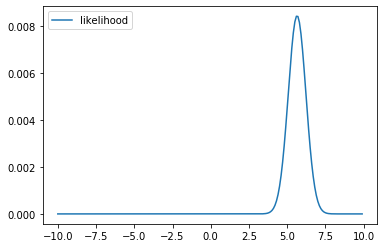

In [37]:
pd.DataFrame({"likelihood":likelihood_arr}, index=x_arr).plot()

In [38]:
# the maximum likelihood is the sample average
np.mean(samples)

5.645742247775305

#### now fix mu as sample mean, vary scale

In [40]:
scale_arr = np.arange(0.1, 10, 0.1)
likelihood_arr2 = [np.product(norm.pdf(samples, loc=np.mean(samples), scale=scale)) for scale in scale_arr]

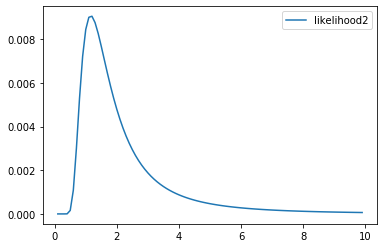

In [41]:
pd.DataFrame({"likelihood2":likelihood_arr2}, index=scale_arr).plot()

In [42]:
samples.std()

1.1596894335142152